In [1]:
import pandas as pd
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import accuracy
from surprise.model_selection import train_test_split

In [60]:
# movielens_df = pd.read_csv("/home/himel/.surprise_data/ml-100k/ml-100k/u.data",sep='\s+', header=None, usecols=[0,1,2,3], engine='python')
# movielens_df = movielens_df.drop([3],axis=1)
data = Dataset.load_builtin('ml-100k')

# for urid, irid, r, timestamp in movielens_df.values:
#     # print(urid, irid, r, timestamp)
# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(movielens_df, reader)
# print(data.raw_ratings)

In [64]:
trainset, testset = train_test_split(data, test_size=.25)
print(trainset.all_items)

<bound method Trainset.all_items of <surprise.trainset.Trainset object at 0x7ff51f031c10>>


In [92]:
pivot_index = int(movielens_df.shape[0]*.75)
reader = Reader(rating_scale=(1,5))
dataset = Dataset(reader)
trainset = dataset.construct_trainset(raw_trainset = movielens_df.values[:pivot_index])
testset  = dataset.construct_testset(raw_testset = movielens_df.values[pivot_index:])

In [167]:
model = SVD()

NameError: name 'SVDpp' is not defined

In [94]:
# model.fit(data.build_full_trainset())
model.fit(trainset)
predictions = model.test(testset)
# accuracy.rmse(predictions)

1000
RMSE: 1.0971
2000
RMSE: 1.0827
3000
RMSE: 1.0762
4000
RMSE: 1.0702
5000
RMSE: 1.0651
6000
RMSE: 1.0612
7000
RMSE: 1.0582
8000
RMSE: 1.0557
9000
RMSE: 1.0531
10000
RMSE: 1.0509
11000
RMSE: 1.0490
12000
RMSE: 1.0443
13000
RMSE: 1.0354
14000
RMSE: 1.0327
15000
RMSE: 1.0326
16000
RMSE: 1.0304
17000
RMSE: 1.0297
18000
RMSE: 1.0270
19000
RMSE: 1.0244
20000
RMSE: 1.0226
21000
RMSE: 1.0227
22000
RMSE: 1.0212
23000
RMSE: 1.0200
24000
RMSE: 1.0182
25000
RMSE: 1.0175
26000
RMSE: 1.0157
27000
RMSE: 1.0152
28000
RMSE: 1.0127
29000
RMSE: 1.0118
30000
RMSE: 1.0115
31000
RMSE: 1.0107
32000
RMSE: 1.0097
33000
RMSE: 1.0079
34000
RMSE: 1.0077
35000
RMSE: 1.0058
36000
RMSE: 1.0058
37000
RMSE: 1.0047
38000
RMSE: 1.0021
39000
RMSE: 1.0026
40000
RMSE: 0.9977
41000
RMSE: 0.9951
42000
RMSE: 0.9945
43000
RMSE: 0.9946
44000
RMSE: 0.9923
45000
RMSE: 0.9910
46000
RMSE: 0.9905
47000
RMSE: 0.9882
48000
RMSE: 0.9887
49000
RMSE: 0.9875
50000
RMSE: 0.9876
51000
RMSE: 0.9835
52000
RMSE: 0.9814
53000
RMSE: 0.9785
54

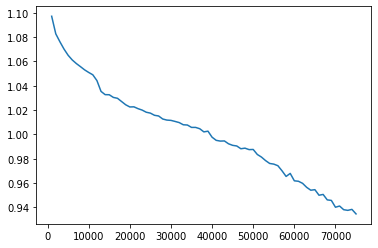

In [78]:
import matplotlib.pyplot as plt
step_size = 1000
start_point = 0
trainset_sizes = []
performane = []
for i in range(int(pivot_index/step_size)):
    trainset = dataset.construct_trainset(raw_trainset = movielens_df.values[0 : start_point + step_size])
    print(f'trainset_size: {trainset.n_ratings}')
    model.fit(trainset)
    start_point += step_size
    predictions = model.test(testset)
    performane.append(accuracy.rmse(predictions))
    trainset_sizes.append(start_point)

plt.plot(trainset_sizes, performane)
plt.show()

In [91]:
ind = 0
for item in testset:
    if float(item[2]) > 5:
        print(ind,item)
        break
    ind +=1

In [103]:
pred_index = 12
# print([x.est for x in predictions[:10]])
# print([y[2] for y in testset[:10]])
print(predictions[pred_index])
print(model.predict(uid= predictions[pred_index].uid, iid= predictions[pred_index].iid)) # 12914 ('145', '974', 1.0)



user: 417        item: 163        r_ui = 4.00   est = 3.60   {'was_impossible': False}
user: 417        item: 163        r_ui = None   est = 3.60   {'was_impossible': False}


In [29]:
# model.qi.shape
item_to_row_idx = model.trainset._raw2inner_id_items
vec = model.qi[item_to_row_idx['1']]

In [127]:
import pandas as pd
headers = [f"col{i}" for i in range(24)]
items_df = pd.read_csv("/home/himel/.surprise_data/ml-100k/ml-100k/u.item",sep='|', 
                        header=None, names=headers, engine='python')
items_dict= items_df.to_dict('list')
items_id_from_name_dict =  dict(zip(items_dict['col1'], items_dict['col0']))
items_name_from_id_dict =  dict(zip(items_dict['col0'], items_dict['col1']))

In [166]:
import itertools
# def top_10_config_recommendation_for_app()

def top_n_movie_recommendation_for_user(uid: str, n: int):
    movie_reatings = {}
    for pred in predictions:
        if str(pred.uid) == uid:
            movie_reatings[pred.iid] = pred.est
    sorted_movie_ratings = dict(sorted(movie_reatings.items(), key=lambda x: x[1], reverse=True))
    return dict(itertools.islice(sorted_movie_ratings.items(), n)) if len(sorted_movie_ratings) > n else sorted_movie_ratings

def top_n_movie_ratings_for_user(uid: str, n: int):
    movie_reatings = {}
    for pred in predictions:
        if str(pred.uid) == uid:
            movie_reatings[pred.iid] = pred.r_ui
    sorted_movie_ratings = dict(sorted(movie_reatings.items(), key=lambda x: x[1], reverse=True))
    return dict(itertools.islice(sorted_movie_ratings.items(), n)) if len(sorted_movie_ratings) > n else sorted_movie_ratings


recommendations = top_n_movie_recommendation_for_user('665', 10)
top_rated = top_n_movie_ratings_for_user('665', 10)

successful_recommendations = 0
for (movie_id, rating) in top_rated.items():
    if movie_id in recommendations:
        print(items_name_from_id_dict[movie_id], rating)
        successful_recommendations+=1
print(f"\nsuccessful_recommendations: {successful_recommendations}")

Pulp Fiction (1994) 5
English Patient, The (1996) 4
2001: A Space Odyssey (1968) 4
Mary Poppins (1964) 4
Blade Runner (1982) 4

successful_recommendations: 5


In [31]:
import numpy as np
def cosine_distance(a, b):
    return 1-np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

def movie_vector(movie_name: str):
    return model.qi[item_to_row_idx[str(items_name_id_dict[movie_name])]]

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

ts_vec = movie_vector('Toy Story (1995)') # |0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
ge_vec = movie_vector('GoldenEye (1995)') # |0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0
akt_vec = movie_vector('Aladdin and the King of Thieves (1996)') # |0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
wt_vec = movie_vector('Wrong Trousers, The (1993)') # |0|0|0|1|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0
gdo_vec = movie_vector('Grand Day Out, A (1992)') # |0|0|0|1|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0
bbda_vec = movie_vector('Beavis and Butt-head Do America (1996)') # |0|0|0|1|0|1|0|0|0|0|0|0|0|0|0|0|0|0|0


# cosine_sim = cosine_similarity(ts_vec.reshape(1, -1), ge_vec.reshape(1, -1))[0][0]
cosine_dist1 = cosine(ts_vec, ge_vec)
cosine_dist2 = cosine(gdo_vec, bbda_vec)
cosine_dist3 = cosine(gdo_vec, ge_vec)
# print(cosine_sim)
print(cosine_dist1)
print(cosine_dist2)
print(cosine_dist3)

0.9012819448421256
0.9980349499203598
0.869338205064826


In [34]:
res = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9338  0.9410  0.9351  0.9402  0.9374  0.9375  0.0028  
MAE (testset)     0.7344  0.7408  0.7378  0.7408  0.7370  0.7382  0.0025  
Fit time          5.06    5.20    5.14    5.59    5.44    5.29    0.20    
Test time         0.15    0.17    0.17    0.16    0.16    0.16    0.01    


In [35]:
print("Hello")
import tensorflow as tf

Hello


ModuleNotFoundError: No module named 'tensorflow'